# Options Trading Strategy Backtesting Analysis

This notebook analyzes option trading opportunities based on probability predictions and distance from at-the-money (ATM) strikes. 

## Overview
- **Data Source**: Option model results with probability predictions
- **Strategy**: Trade options when probability exceeds statistical thresholds
- **Risk Management**: Fixed risk per trade ($5,000)
- **Analysis Period**: Multi-year backtesting with year-over-year comparison

## Key Metrics
- **Distance from ATM**: Measured in percentage terms 
- **Probability Threshold**: Mean + 1 standard deviation per distance bucket
- **Return Calculation**: Entry at close vs exit at 15:30 next day
- **Portfolio Management**: $100,000 starting capital, position sizing based on risk

In [152]:
# Import required libraries for data analysis
import pandas as pd

In [153]:
# Load the option model results CSV file
# This contains historical option data with probability predictions
df = pd.read_csv('/home/mrmath/Downloads/vwap_model_/option_model/option_model_results.csv')
df

,level_0,index,option,timestamp,open,high,low,close,volume,datetime,...,seconds_since_open,seconds_until_close,option_ret_from_open,year,pct_gain_15_30,side_aware_dist_from_ATM,side_int,prediction,probability,train_years
0,282685,282763,O:SPY230103C00376000,1672763400000,3.98,3.98,3.98,3.98,10,2023-01-03 11:30:00-05:00,...,7200.0,16200.0,0.0,2023,0.233668,-0.007916,1,0,0.437590,[np.int32(2022)]
1,282686,282764,O:SPY230103C00376000,1672763700000,3.69,3.91,3.69,3.89,5,2023-01-03 11:35:00-05:00,...,7500.0,15900.0,-9.0,2023,0.262211,-0.007916,1,1,0.511087,[np.int32(2022)]
2,282687,282765,O:SPY230103C00376000,1672764000000,3.79,3.79,3.60,3.60,6,2023-01-03 11:40:00-05:00,...,7800.0,15600.0,-38.0,2023,0.363889,-0.007916,1,0,0.437855,[np.int32(2022)]
3,282688,282766,O:SPY230103C00376000,1672764300000,3.23,3.28,3.15,3.28,81,2023-01-03 11:45:00-05:00,...,8100.0,15300.0,-70.0,2023,0.496951,-0.007916,1,0,0.341453,[np.int32(2022)]
4,282689,282767,O:SPY230103C00376000,1672764600000,3.00,3.36,3.00,3.15,113,2023-01-03 11:50:00-05:00,...,8400.0,15000.0,-83.0,2023,0.558730,-0.005291,1,0,0.387210,[np.int32(2022)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169285,2399035,2398758,O:SPY251231P00695000,1767210600000,10.69,10.98,10.69,10.98,6,2025-12-31 14:50:00-05:00,...,19200.0,4200.0,59.0,2025,0.071949,-0.016082,-1,0,0.396332,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169286,2399037,2398760,O:SPY251231P00695000,1767211800000,11.77,11.77,11.77,11.77,1,2025-12-31 15:10:00-05:00,...,20400.0,3000.0,138.0,2025,0.000000,-0.017570,-1,0,0.362692,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169287,2399056,2398196,O:SPY251231P00696000,1767207900000,10.03,10.04,10.03,10.04,2,2025-12-31 14:05:00-05:00,...,16500.0,6900.0,0.0,2025,0.000000,-0.014577,-1,0,0.389049,"[np.int32(2022), np.int32(2023), np.int32(2024)]"
1169288,2399063,2398321,O:SPY251231P00697000,1767200400000,11.70,11.72,11.52,11.62,11,2025-12-31 12:00:00-05:00,...,9000.0,14400.0,0.0,2025,0.051635,-0.017518,-1,1,0.533284,"[np.int32(2022), np.int32(2023), np.int32(2024)]"


In [154]:
# Examine the available columns in our dataset
df.columns

Index(['level_0', 'index', 'option', 'timestamp', 'open', 'high', 'low',
       'close', 'volume', 'datetime', 'close_spy', 'ATM_strike',
       'strike_price', 'dist_from_ATM', 'close_in_cents', 'pos_in_day_range',
       'close_5m_ago', 'price_change_5m', 'rolling_min_5m', 'rolling_max_5m',
       'rolling_std_5m', 'pos_in_rolling_range_5m',
       'directional_rolling_std_5m', 'close_10m_ago', 'price_change_10m',
       'rolling_min_10m', 'rolling_max_10m', 'rolling_std_10m',
       'pos_in_rolling_range_10m', 'directional_rolling_std_10m',
       'close_15m_ago', 'price_change_15m', 'rolling_min_15m',
       'rolling_max_15m', 'rolling_std_15m', 'pos_in_rolling_range_15m',
       'directional_rolling_std_15m', 'close_30m_ago', 'price_change_30m',
       'rolling_min_30m', 'rolling_max_30m', 'rolling_std_30m',
       'pos_in_rolling_range_30m', 'directional_rolling_std_30m',
       'close_60m_ago', 'price_change_60m', 'rolling_min_60m',
       'rolling_max_60m', 'rolling_std_60m', '

In [155]:
# Convert side-aware distance from ATM to percentage terms
# This makes it easier to interpret how far out-of-the-money each option is
df['dist_atm_pct'] = df['side_aware_dist_from_ATM'] * 100

In [156]:
# Display the new distance percentage alongside option prices
# This helps us understand the relationship between strike distance and option cost
df[['dist_atm_pct', 'close_in_cents']]

,dist_atm_pct,close_in_cents
0,-0.791557,398.0
1,-0.791557,389.0
2,-0.791557,360.0
3,-0.791557,328.0
4,-0.529101,315.0
...,...,...
1169285,-1.608187,1098.0
1169286,-1.756955,1177.0
1169287,-1.457726,1004.0
1169288,-1.751825,1162.0


In [157]:
import numpy as np
import pandas as pd

df = df.copy()

# STEP 1: Create rounded distance buckets for statistical analysis
# Round to nearest 0.5% and clip extreme values to avoid sparse data
df["dist_otm_pct_rounded"] = ((df["dist_atm_pct"] * 2).round() / 2).clip(lower=-3, upper=3)

# STEP 2: Ensure consistent sorting before grouping
df = df.sort_values(["dist_otm_pct_rounded", "datetime"])  # Sort by bucket and datetime

# Group by rounded distance to compute mean and standard deviation of probabilities
grouped = df.groupby("dist_otm_pct_rounded")["probability"]

df["mean_prob"] = grouped.expanding().mean().reset_index(level=0, drop=True)
df["std_prob"]  = grouped.expanding().std().reset_index(level=0, drop=True)

# STEP 3: Define probability threshold for trade entry
# Only trade when probability exceeds mean + 1 standard deviation for that distance bucket
threshold = df["mean_prob"] + 1 * df["std_prob"]

# STEP 4: Apply trading filters
mask = (
    (df["year"] != 2022) &  # Exclude 2022 data (possibly for out-of-sample testing)
    (df["probability"] > threshold)  # Only high-probability opportunities
)

# STEP 5: Calculate returns (entry at close vs exit at 15:30 next day)
# This simulates buying at close and selling at 3:30 PM the following day
df["ret"] = (df["price_at_15_30"] - df["close_in_cents"]) / df["close_in_cents"]

# STEP 6: Create filtered dataset with only qualifying trades
ret_df = df.loc[mask, :].copy()

In [158]:
# Calculate the average return across all qualifying trades
# This gives us the basic profitability of our strategy
ret_df['ret'].mean()

np.float64(-0.08261193486198756)

In [159]:
# Convert datetime to proper timezone (UTC to Eastern Time)
# This ensures we're working with market hours correctly
ret_df['datetime'] = pd.to_datetime(ret_df['datetime'], utc=True).dt.tz_convert('America/New_York')

In [160]:
# Examine the 'side' column to understand call vs put distribution
# This helps us understand our option types (calls vs puts)
ret_df['side']

1218        put
3957       call
3967       call
3990       call
3968       call
           ... 
1118135    call
1118136    call
1118137    call
1118138    call
1120691     put
Name: side, Length: 116128, dtype: object

In [219]:
ret_df = ret_df.sort_values(
    ['dist_otm_pct_rounded', 'datetime', 'side']
)

# Extract trading date
ret_df['date'] = ret_df['datetime'].dt.date

# Keep first trade per (OTM, Call/Put, Day)
filtered = (
    ret_df
    .groupby(['dist_otm_pct_rounded', 'side', 'date'])
    .first()
    .reset_index()
)

# Rebuild dictionary
otm_ret = dict(tuple(
    filtered.groupby('dist_otm_pct_rounded')
))


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

summary = []
equity_curves = {}

# 1. Group by OTM distance
for dist, g in filtered.groupby('dist_otm_pct_rounded'):
    # Ensure chronological order for the cumulative sum to work
    g = g.sort_values('datetime').copy()
    
    # Vectorized PnL Calculation
    # Note: Using .values or .to_numpy() helps avoid index misalignment
    entries = g['close_in_cents'].values / 100
    exits = g['price_at_15_30'].values / 100
    
    # Filter out invalid prices
    valid_mask = (entries > 0) & (exits > 0)
    g = g[valid_mask].copy()
    entries = entries[valid_mask]
    exits = exits[valid_mask]
    
    trade_amount = 5000
    # Calculate contracts: floor division to simulate real trading
    # We use 100 because 1 option contract usually controls 100 shares
    contracts = (trade_amount / (entries * 100)).astype(int)
    
    # Calculate PnL per trade
    # PnL = contracts * 100 * (Price Change)
    g['pnl'] = 100 * contracts * (exits - entries)
    
    # Group by datetime in case there are multiple trades (Call + Put) at once
    daily_pnl = g.groupby('datetime')['pnl'].sum().sort_index()
    
    # Calculate the Equity Curve
    initial_capital = 100000
    curve = initial_capital + daily_pnl.cumsum()
    
    # Add a starting point at the first date - 1 second so it starts at $100k
    start_point = pd.Series([initial_capital], index=[daily_pnl.index[0] - pd.Timedelta(seconds=1)])
    full_curve = pd.concat([start_point, curve])
    
    equity_curves[dist] = full_curve
    
    summary.append({
        'dist_otm_pct_rounded': dist,
        'final_capital': full_curve.iloc[-1],
        'total_return_pct': (full_curve.iloc[-1] - initial_capital) / initial_capital * 100,
        'number_of_trades': len(g)
    })


summary_df = pd.DataFrame(summary).sort_values("dist_otm_pct_rounded")
summary_df

,dist_otm_pct_rounded,final_capital,total_return_pct,number_of_trades
0,-3.0,105966.0,5.966,37
1,-2.5,104280.0,4.280,72
2,-2.0,123113.0,23.113,196
3,-1.5,114721.0,14.721,291
4,-1.0,132176.0,32.176,456
5,-0.5,158095.0,58.095,763
6,-0.0,152248.0,52.248,1271
7,0.5,928103.0,828.103,1031
8,1.0,1092538.0,992.538,770
9,1.5,551448.0,451.448,479


/tmp/ipykernel_8993/2425679840.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(pnl_curves))


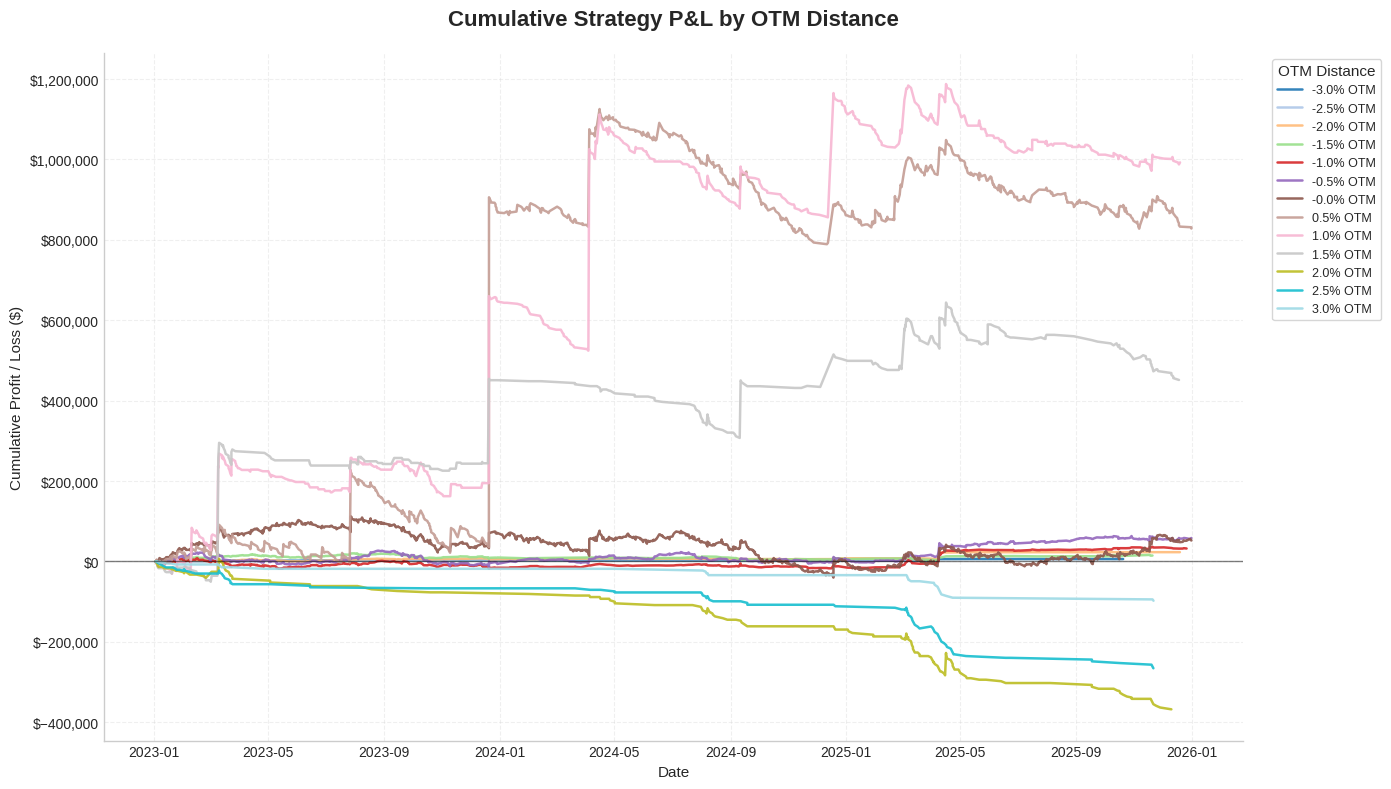

In [221]:
import pandas as pd
import matplotlib.pyplot as plt

# We'll store the PnL curves here
pnl_curves = {}

for dist, g in filtered.groupby('dist_otm_pct_rounded'):
    # 1. Sort by datetime to ensure the PnL flows correctly
    g = g.sort_values('datetime').copy()
    
    # 2. Calculate PnL for each trade
    # PnL = 100 * contracts * (exit_price - entry_price)
    entries = g['close_in_cents'].values / 100
    exits = g['price_at_15_30'].values / 100
    
    # Filter valid trades to avoid math errors
    valid_mask = (entries > 0) & (exits > 0)
    g = g[valid_mask].copy()
    
    trade_amount = 5000
    # Calculate number of contracts bought with $5k
    g['contracts'] = (trade_amount / (g['close_in_cents'] / 100 * 100)).astype(int)
    g['trade_pnl'] = 100 * g['contracts'] * (exits[valid_mask] - entries[valid_mask])
    
    # 3. Aggregate trades happening at the same time (e.g. Call + Put)
    # This fixes the 'zig-zag' lines in the original plot
    daily_pnl = g.groupby('datetime')['trade_pnl'].sum().sort_index()
    
    # 4. Create the cumulative PnL curve (starting at 0)
    cumulative_pnl = daily_pnl.cumsum()
    
    # Add a zero-point at the start for better visualization
    start_dt = daily_pnl.index[0] - pd.Timedelta(days=1)
    pnl_curves[dist] = pd.concat([pd.Series({start_dt: 0}), cumulative_pnl])



import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 1. Use 'tab20' to ensure every single line has a unique, distinct color
colors = plt.cm.get_cmap('tab20', len(pnl_curves))

plt.figure(figsize=(14, 8))
ax = plt.gca()

# 2. Plot with unique colors
for i, dist in enumerate(sorted(pnl_curves.keys())):
    curve = pnl_curves[dist]
    ax.plot(
        curve.index, 
        curve.values, 
        label=f"{dist}% OTM", 
        color=colors(i), 
        linewidth=1.8,
        alpha=0.9
    )

# 3. Optimize the Legend
# ncol=2 splits the legend into two columns to prevent it from being too tall
plt.legend(
    title="OTM Distance", 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    fontsize=9,
    title_fontsize=11,
    frameon=True,
    shadow=False,
    ncol=1 # Change to 2 if you want to save vertical space
)

# 4. Refined Aesthetics
plt.title("Cumulative Strategy P&L by OTM Distance", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Cumulative Profit / Loss ($)", fontsize=11)
plt.xlabel("Date", fontsize=11)

# Ensure the zero line is distinct but not distracting
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Format Y-axis for currency
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))

# Lighter grid for a cleaner look
plt.grid(True, linestyle='--', alpha=0.3)

# Remove the box spines for a modern feel
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()